<a href="https://colab.research.google.com/github/Tochindefo/Tochindefo/blob/main/multi_classification_of_tweets%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import re
import json
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

#Upload data and Visualize

In [ ]:
data = pd.read_json('CETM47-22_23-AS2-Data (1).json')
data.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


#Extracting releavant columns

In [ ]:
# extract the 'text' column
text = [t.lower() for t in data['text']]
#text = data['text']
label = data['label']

In [ ]:
text[0]

'the {@clinton lumberkings@} beat the {@cedar rapids kernels@} 4-0 in game 1 of the western division finals. evan edwards hit a 2-run hr. wp josh roberson: 5 ip, 3 h, 0 r, 0 bb, 10 k #mwlplayoffs #mwlscoreboard'

In [ ]:
label

0       4
1       4
2       4
3       4
4       4
       ..
6438    3
6439    1
6440    2
6441    2
6442    1
Name: label, Length: 6443, dtype: int64

#Clean up tweet

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # remove URLs
    tweet = re.sub(r'@[^\s]+', '', tweet)  # remove mentions
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # remove non-alphanumeric characters
    tweet = tweet.lower()  # convert text to lowercase
    return tweet

data['text'] = data['text'].apply(clean_tweet)
data

,text,date,label,id,label_name
0,the lumberkings beat the rapids kernels 40 i...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,someone take my phone away im trying to not lo...,2019-09-08,4,1170516543387709440,sports_&_gaming
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture
6441,ride with me mental health awareness charity ...,2021-08-29,2,1432069101753491456,pop_culture


In [ ]:
print(data)

                                                   text       date  label  \
0     the  lumberkings beat the  rapids kernels 40 i... 2019-09-08      4   
1     i would rather hear eli gold announce this aub... 2019-09-08      4   
2     someone take my phone away im trying to not lo... 2019-09-08      4   
3     a year ago louisville struggled to beat an fcs... 2019-09-08      4   
4     anyone know why the dodgers orioles game next ... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  praying for username family friends riding out... 2021-08-29      3   
6439  etsy username hi there i m sorry to hear that ... 2021-08-29      1   
6440  imagine how hard it is to be a teume everyone ... 2021-08-29      2   
6441  ride with me  mental health awareness charity ... 2021-08-29      2   
6442  prediction the future of cx in  company quarte... 2021-08-29      1   

                       id                label_name  
0     117051632441986

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
#text = [re.sub(r"http\s+|@\s+|-\s+|#\s+|{\s+|}\s+|\\s+|","", x) for x in text]

# creat a function for extracting url,mentios and non-alphanumeric
# remove url, tags, metios, colums and non-alphanumeric
for i in range(len(text)):
    text[i] = re.sub(r"http\S+", "", text[i])
    text[i] = re.sub(r"@\S+", "", text[i])
    text[i] = re.sub(r"#\S+", "", text[i])
    text[i] = re.sub(r"}\S+", "", text[i])
    text[i] = re.sub(r"{\S+", "", text[i])
    #text[i] = re.sub(r"-\S+", "", text[i])
    text[i] = re.sub(r":\S+", "", text[i])
    text[i] = re.sub(r"!\S+", "", text[i])

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

corpus = []
for doc in text:
    # Tokenize the text
    words = word_tokenize(doc)
    # Remove stop words and stem the words
    words = [ps.stem(w) for w in words if not w.lower() in stop_words]

    # Append the processed words to the corpus
    corpus.append(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text[0]

'the { lumberkings beat the { rapids kernels 4-0 in game 1 of the western division finals. evan edwards hit a 2-run hr. wp josh roberson: 5 ip, 3 h, 0 r, 0 bb, 10 k  '

In [ ]:
data

,text,date,label,id,label_name
0,the lumberkings beat the rapids kernels 40 i...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,someone take my phone away im trying to not lo...,2019-09-08,4,1170516543387709440,sports_&_gaming
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture
6441,ride with me mental health awareness charity ...,2021-08-29,2,1432069101753491456,pop_culture


#Splitting the data into Training and Test sets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the bag-of-words model
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.25, random_state=0)


#Models

#svm

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Convert the tweets to numerical features
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(text)


# Define the SVM model and fit it to the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model's accuracy
# Calculate accuracy, precision, recall, and F1 score
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print('SVM classification result:')
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 score:", svm_f1)


SVM classification result:
Accuracy: 0.7510862818125388
Precision: 0.7657074324675514
Recall: 0.7510862818125388
F1 score: 0.7293345931401161


In [ ]:
from sklearn.metrics import confusion_matrix

# Define the SVM model and fit it to the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[  3   0  26   6   3   0]
 [  0  21  39  18   9   0]
 [  0   0 551  29  41   5]
 [  0   1  67 113  28   1]
 [  0   0  64   8 492   0]
 [  0   1  28  11  16  30]]


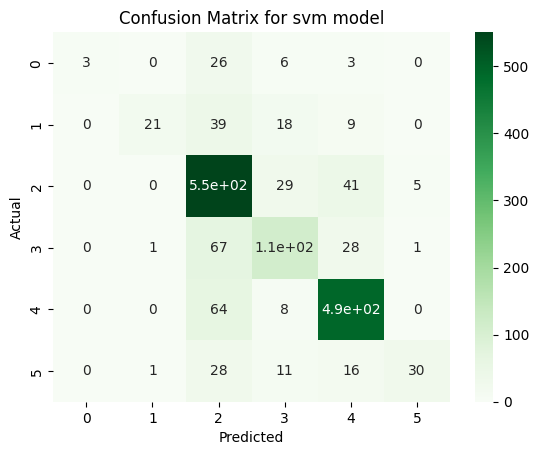

In [ ]:

# Define the SVM model and fit it to the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Greens")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for svm model")

# Display the plot
plt.show()


#Random Forest model

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Convert the tweets to numerical features
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(text)

# Define the random forest model and fit it to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
# Calculate accuracy, precision, recall, and F1 score
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print('Random Forest classification result:')
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 score:", rf_f1)


Random Forest classification result:
Accuracy: 0.686530105524519
Precision: 0.726950027260605
Recall: 0.686530105524519
F1 score: 0.6427716493164782


In [ ]:
from sklearn.metrics import confusion_matrix

# Define the Random Forest model and fit it to the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[  1   0  25   0  12   0]
 [  0   6  62   6  13   0]
 [  0   0 562  10  50   4]
 [  0   0 113  62  35   0]
 [  0   0 108   5 451   0]
 [  0   0  42   3  21  20]]


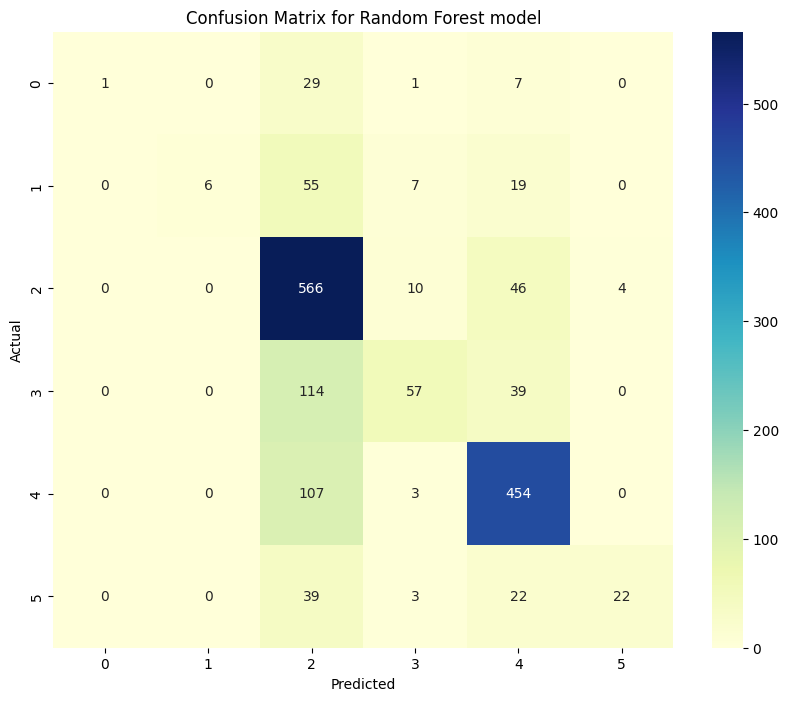

In [ ]:
# Convert the tweets to numerical features
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(text)

# Define the random forest model and fit it to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g')
# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest model")
plt.show()

#Decision Tree model

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Convert the tweets to numerical features
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(text)


# Define the decision tree model and fit it to the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
# Calculate accuracy, precision, recall, and F1 score
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print('Decision Tree classification result:')
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 score:", dt_f1)


Decision Tree classification result:
Accuracy: 0.5927995034140285
Precision: 0.5828228963404503
Recall: 0.5927995034140285
F1 score: 0.5847807424594849


In [ ]:

# Define the decision tree model and fit it to the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[  1   1  18   5  13   0]
 [  1  16  34  19  14   3]
 [  8  10 433  77  80  18]
 [  7   3  63  88  45   4]
 [  7   9 109  37 389  13]
 [  0   2  22  13  21  28]]


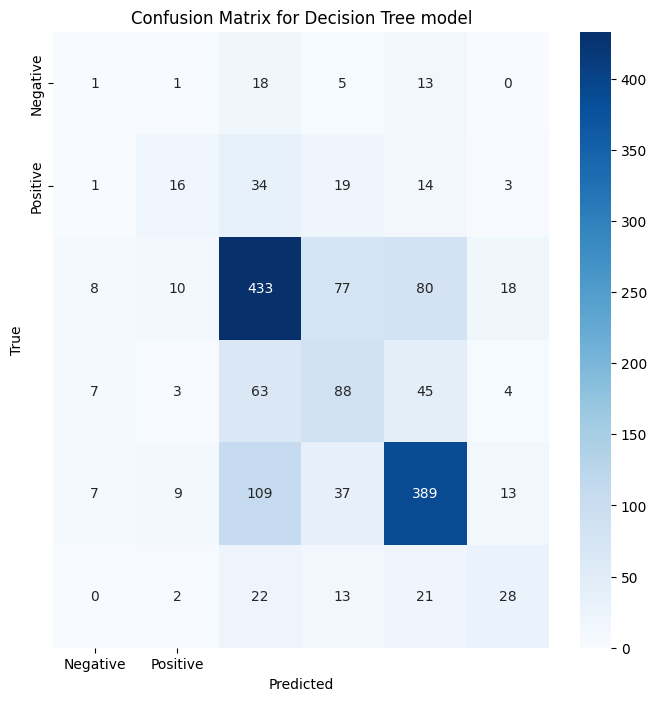

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision Tree model")
plt.show()

# Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB


# Define the Naive Bayes model and fit it to the training data
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the model's accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print('Naive Bayes classification result:')
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 score:", nb_f1)


Naive Bayes classification result:
Accuracy: 0.6828057107386716
Precision: 0.7723495444481367
Recall: 0.6828057107386716
F1 score: 0.5871930396922341


In [ ]:

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print('Confusion Matrix:\n', cf_matrix)


Confusion Matrix:
 [[  0   0  32   0   6   0]
 [  0   0  60   0  27   0]
 [  0   0 582   0  44   0]
 [  0   0 162   5  43   0]
 [  0   0  51   0 513   0]
 [  0   0  58   0  28   0]]


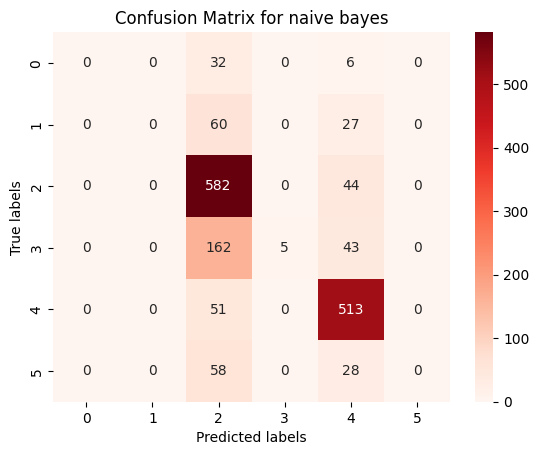

In [ ]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for naive bayes')
plt.show()


# scores comparism for each model

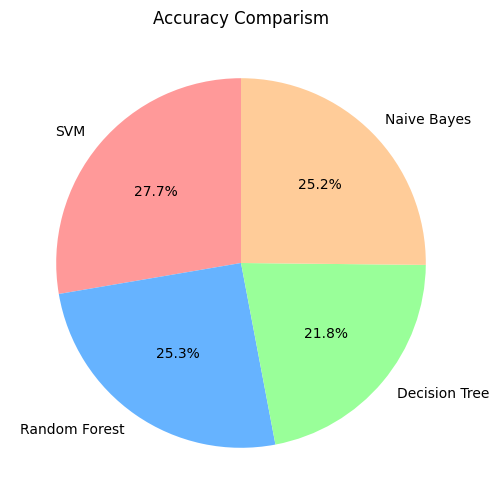

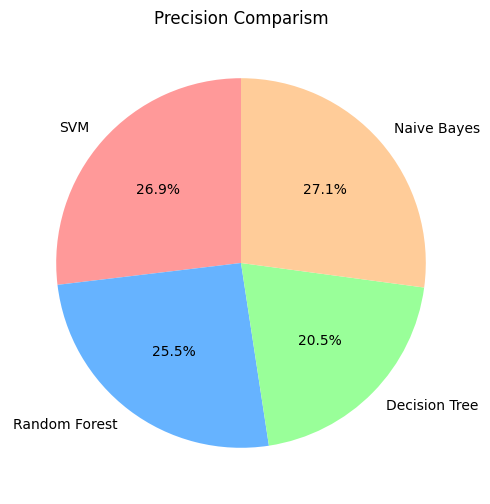

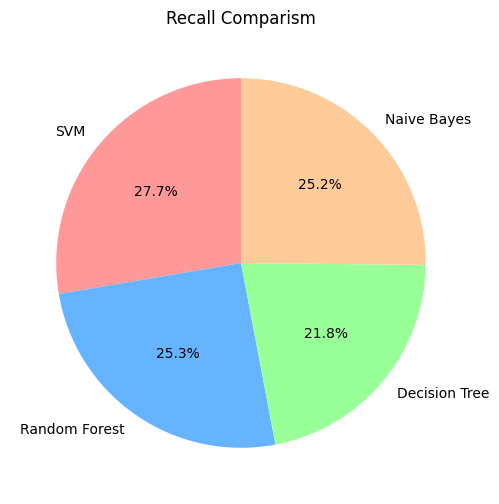

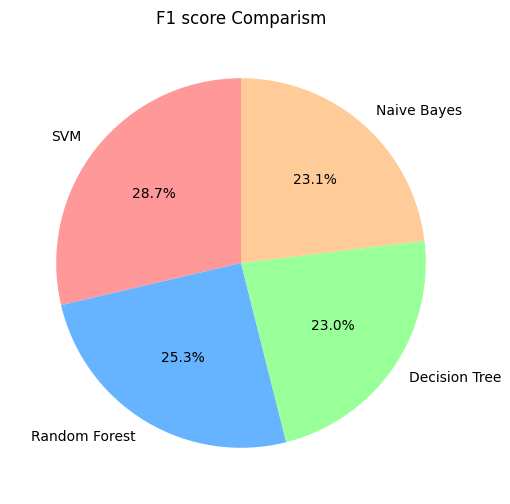

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding metrics
classifiers = ['SVM','Random Forest', 'Decision Tree', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
scores = [[svm_accuracy, rf_accuracy, dt_accuracy, nb_accuracy],
          [svm_precision, rf_precision, dt_precision, nb_precision],
          [svm_recall, rf_recall, dt_recall, nb_recall],
          [svm_f1, rf_f1, dt_f1, nb_f1]]

# Create a color palette for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart for each score list
for i in range(len(scores)):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(scores[i], labels=classifiers, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(metrics[i] + ' Comparism')
    plt.show()


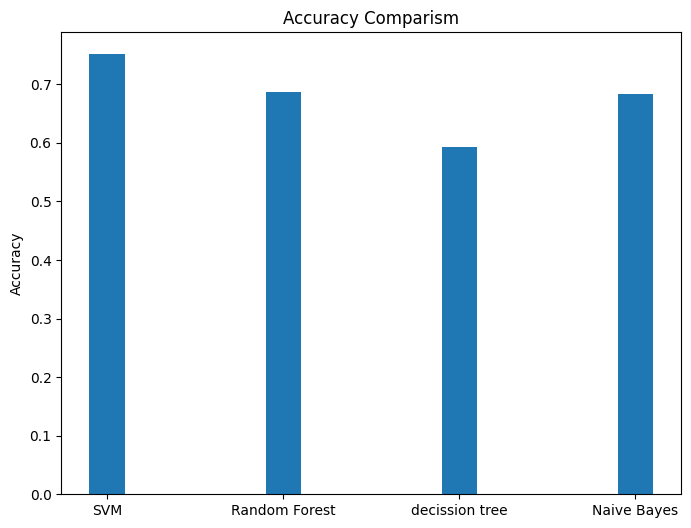

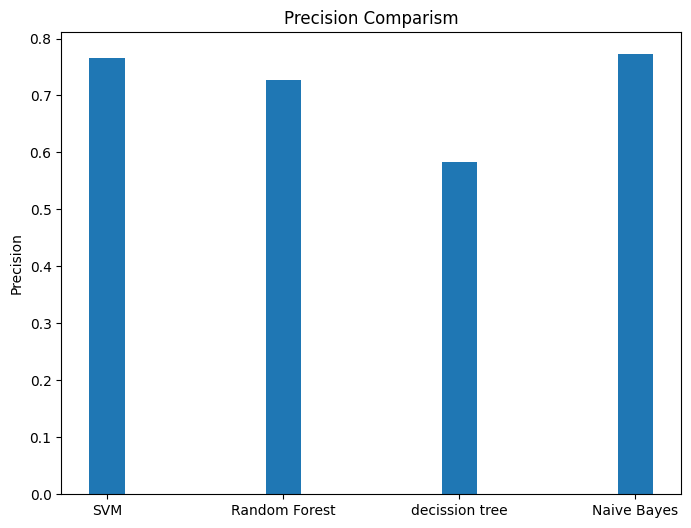

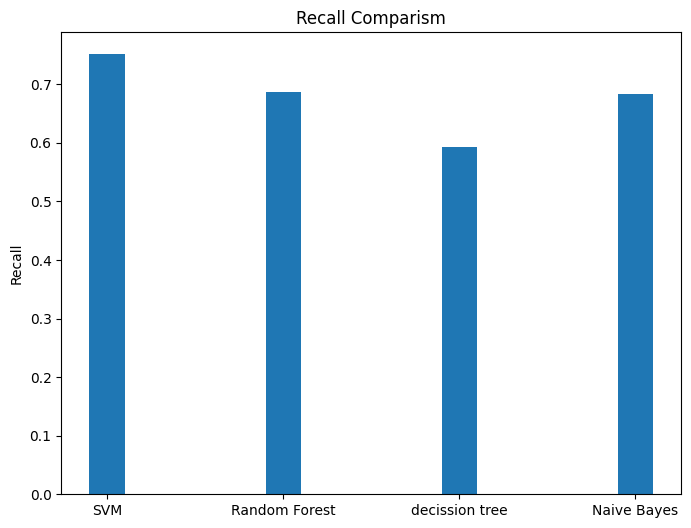

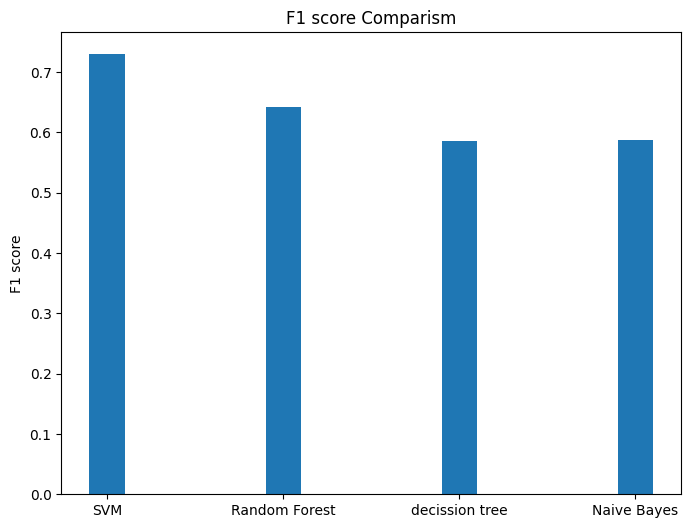

In [ ]:
# Define the classifiers and their corresponding metrics
classifiers = ['SVM','Random Forest',  'decission tree', 'Naive Bayes', ]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
scores = [[svm_accuracy, rf_accuracy, dt_accuracy, nb_accuracy],
          [svm_precision, rf_precision, dt_precision, nb_precision],
          [svm_recall, rf_recall, dt_recall, nb_recall],
          [svm_f1, rf_f1, dt_f1, nb_f1]]


# Set the width of each bar
width = 0.2

# Create a bar chart for each metric
for i in range(len(metrics)):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(classifiers, scores[i], width)
    ax.set_title(metrics[i] + ' Comparism')
    ax.set_ylabel(metrics[i])
    plt.show()